# 1. Random Forest Classifier- Credit Card Default Dataset

#### 1.1. Package and Dataset import

In [1]:
import numpy as np
import pandas as pd
import itertools
from scipy import interp
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv('UCI_Credit_Card.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

#### 1.2. Confusion matrix and AUC/ROC curve

In [3]:
# source : http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def display_roc(classifier, X, y, number_of_fold=10):
    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=10)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i=0
    for train, test in cv.split(X,y):
        classifier.fit(X[train], y[train])
        y_predicted = classifier.predict(X[test])
        fpr, tpr, thresholds = metrics.roc_curve(y[test], y_predicted)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i += 1

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC visualization')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
def display_accuracy_analysis_and_confusion_matrix(y_test, y_predicted, classes_name, confusion_matrix_title):
    # # Classification accuracy -> how often the classifier is correct
    print ('Classification accuracy is :', metrics.accuracy_score(y_test, y_predicted, normalize = True) * 100, '%')
    # # Calculate null accuracy for binary classification problems coded as 0 and 1.
    # # Null accuracy : accuracy that could be achieved by always predicting the most frequent class
    print ('Null accuracy is :', max(y_test.mean(), 1 - y_test.mean()) * 100, '%')
    # # Classification error -> how often the classifier is incorrect
    print ('Classification error is :', (1- metrics.accuracy_score(y_test, y_predicted, normalize = True)) * 100, '%')
    # # When the actual value is positive (1 -> default), how often the prediction is correct ?
    print ('Sensitivity is :', metrics.recall_score(y_test, y_predicted) * 100, '%')
    # # Confusion matrix (2x2 matrix since there is 2 response classes) TPR (True Positive Rate) FPR (False Positive Rate)
    confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
    plot_confusion_matrix(confusion_matrix, classes=classes_name, normalize=False, title=confusion_matrix_title)
    plt.show()

#### 1.3. Splitting dataset between test and train datasets.

In [4]:
X = data.values[:,1:-1]
y = data.values[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

#### 1.4. Random Forrest Classification Model

##### 1.4.1 Random Forest with minimum leaf=5 and number of estimators=500

Classification accuracy is : 81.9696969697 %
Null accuracy is : 77.4747474747 %
Classification error is : 18.0303030303 %
Sensitivity is : 36.6367713004 %


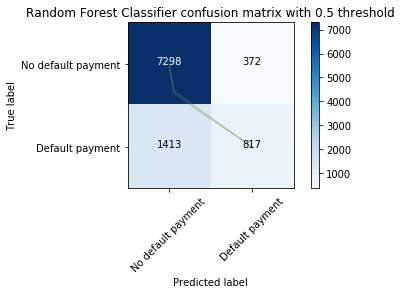

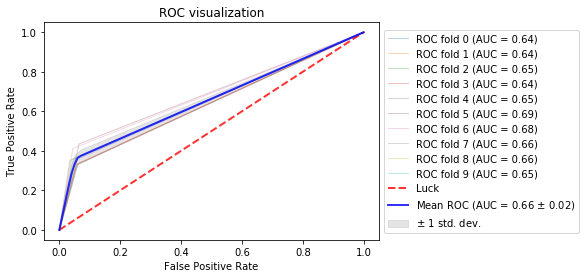

Classification accuracy is : 78.1515151515 %
Null accuracy is : 77.4747474747 %
Classification error is : 21.8484848485 %
Sensitivity is : 3.58744394619 %


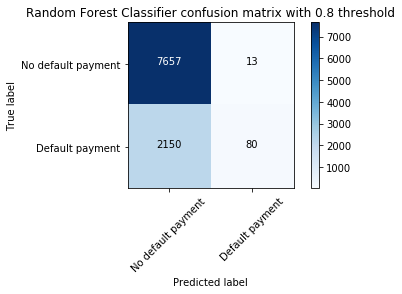

Classification accuracy is : 44.9898989899 %
Null accuracy is : 77.4747474747 %
Classification error is : 55.0101010101 %
Sensitivity is : 92.2869955157 %


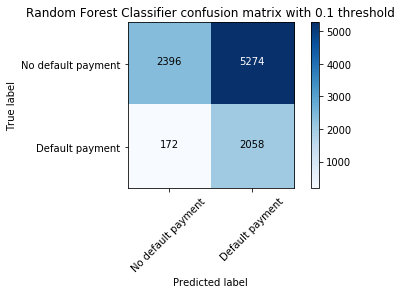

Classification accuracy is : 81.8181818182 %
Null accuracy is : 77.4747474747 %
Classification error is : 18.1818181818 %
Sensitivity is : 30.8968609865 %


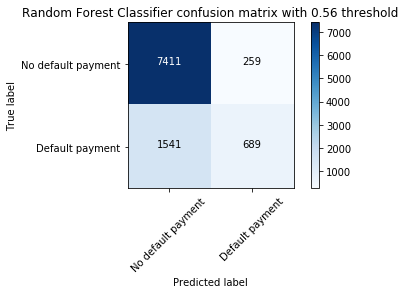

In [58]:
#with thresold 0.5
randomf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
randomf.fit(X_train,y_train)
y_predicted=randomf.predict(X_test)
display_accuracy_analysis_and_confusion_matrix(y_test, y_predicted, 
                        ['No default payment', 'Default payment'], 'Random Forest Classifier confusion matrix with 0.5 threshold')

display_roc(RandomForestClassifier(n_estimators=500, min_samples_leaf=5), X, y)

# Testing other threshold than 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)
randomf2 = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
randomf2.fit(X_train,y_train)

y_predicted = randomf2.predict_proba(X_test)
y_test_predictions_high_precision = y_predicted[:,1] > 0.8
y_test_predictions_high_recall = y_predicted[:,1] > 0.1
y_test_predictions_suggested_by_AUC = y_predicted[:,1] > 0.56

display_accuracy_analysis_and_confusion_matrix(y_test, y_test_predictions_high_precision, 
                        ['No default payment', 'Default payment'], 'Random Forest Classifier confusion matrix with 0.8 threshold')

display_accuracy_analysis_and_confusion_matrix(y_test, y_test_predictions_high_recall, 
                        ['No default payment', 'Default payment'], 'Random Forest Classifier confusion matrix with 0.1 threshold')

display_accuracy_analysis_and_confusion_matrix(y_test, y_test_predictions_suggested_by_AUC, 
                        ['No default payment', 'Default payment'], 'Random Forest Classifier confusion matrix with 0.56 threshold')


##### 1.4.2. Random Forest with minimum leaf=10 and number of estimators=1000

Classification accuracy is : 82.0202020202 %
Null accuracy is : 77.4747474747 %
Classification error is : 17.9797979798 %
Sensitivity is : 36.2780269058 %


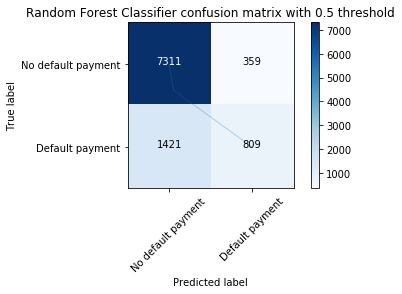

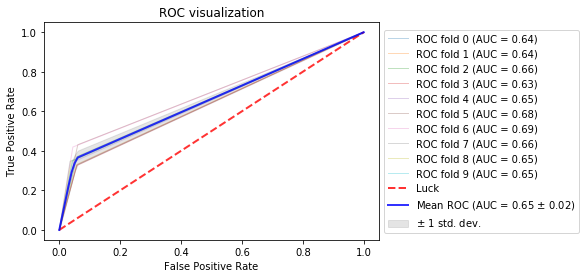

Classification accuracy is : 78.0 %
Null accuracy is : 77.4747474747 %
Classification error is : 22.0 %
Sensitivity is : 2.69058295964 %


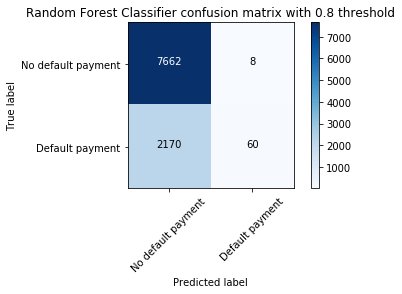

Classification accuracy is : 44.6666666667 %
Null accuracy is : 77.4747474747 %
Classification error is : 55.3333333333 %
Sensitivity is : 93.4977578475 %


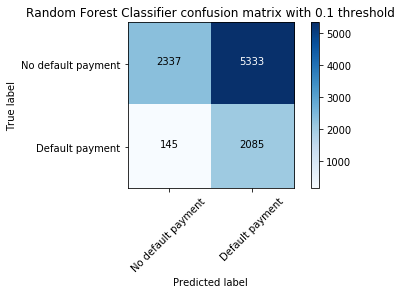

Classification accuracy is : 81.8787878788 %
Null accuracy is : 77.4747474747 %
Classification error is : 18.1212121212 %
Sensitivity is : 31.2556053812 %


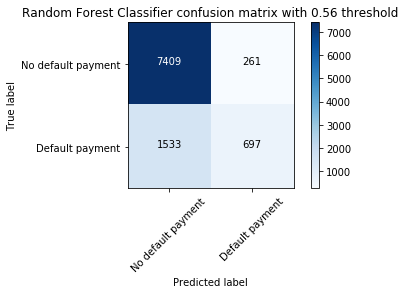

In [64]:
#with thresold 0.5
randomf = RandomForestClassifier(n_estimators=1000, min_samples_leaf=10)
randomf.fit(X_train,y_train)
y_predicted=randomf.predict(X_test)
display_accuracy_analysis_and_confusion_matrix(y_test, y_predicted, 
                        ['No default payment', 'Default payment'], 'Random Forest Classifier confusion matrix with 0.5 threshold')

display_roc(RandomForestClassifier(n_estimators=1000, min_samples_leaf=10), X, y)

# Testing other threshold than 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)
randomf2 = RandomForestClassifier(n_estimators=1000, min_samples_leaf=10)
randomf2.fit(X_train,y_train)

y_predicted = randomf2.predict_proba(X_test)
y_test_predictions_high_precision = y_predicted[:,1] > 0.8
y_test_predictions_high_recall = y_predicted[:,1] > 0.1
y_test_predictions_suggested_by_AUC = y_predicted[:,1] > 0.56

display_accuracy_analysis_and_confusion_matrix(y_test, y_test_predictions_high_precision, 
                        ['No default payment', 'Default payment'], 'Random Forest Classifier confusion matrix with 0.8 threshold')

display_accuracy_analysis_and_confusion_matrix(y_test, y_test_predictions_high_recall, 
                        ['No default payment', 'Default payment'], 'Random Forest Classifier confusion matrix with 0.1 threshold')

display_accuracy_analysis_and_confusion_matrix(y_test, y_test_predictions_suggested_by_AUC, 
                        ['No default payment', 'Default payment'], 'Random Forest Classifier confusion matrix with 0.56 threshold')


#### 1.5 Evaluation

TODO

# 2. Random Forest Classifier- Credit Card Fraud Dataset

#### 2.1 Importing Dataset

In [5]:
data2=pd.read_csv('creditcard.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

#### 2.2 Splitting dataset into train and test sets

In [6]:
X = data2.values[:,1:-1]
y = data2.values[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

#### 2.3 Random Forest Classification Model

###### 2.3.1 Random Forest with minimum leaf=5 and number of estimators=500

Classification accuracy is : 99.9616968304 %
Null accuracy is : 99.8286997138 %
Classification error is : 0.0383031695873 %
Sensitivity is : 80.1242236025 %


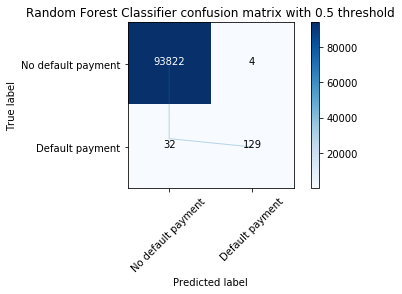

KeyboardInterrupt: 

In [11]:
#with 0.5 thresold 
randomf = RandomForestClassifier(n_estimators=500,min_samples_leaf=5)
randomf.fit(X_train, y_train)
y_predicted = randomf.predict(X_test)

display_accuracy_analysis_and_confusion_matrix(y_test, y_predicted, 
                        ['No default payment', 'Default payment'], 'Random Forest Classifier confusion matrix with 0.5 threshold')

display_roc(RandomForestClassifier(n_estimators=500, min_samples_leaf=5), X, y)

# Testing other threshold than 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)
randomf2 = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
randomf2.fit(X_train,y_train)

y_predicted = randomf2.predict_proba(X_test)
y_test_predictions_high_precision = y_predicted[:,1] > 0.8
y_test_predictions_high_recall = y_predicted[:,1] > 0.1
y_test_predictions_suggested_by_AUC = y_predicted[:,1] > 0.56

display_accuracy_analysis_and_confusion_matrix(y_test, y_test_predictions_high_precision, 
                        ['No default payment', 'Default payment'], 'Random Forest Classifier confusion matrix with 0.8 threshold')

display_accuracy_analysis_and_confusion_matrix(y_test, y_test_predictions_high_recall, 
                        ['No default payment', 'Default payment'], 'Random Forest Classifier confusion matrix with 0.1 threshold')

display_accuracy_analysis_and_confusion_matrix(y_test, y_test_predictions_suggested_by_AUC, 
                        ['No default payment', 'Default payment'], 'Random Forest Classifier confusion matrix with 0.56 threshold')


###### 2.3.2 Random Forest with minimum leaf=10 and number of estimators=1000

Classification accuracy is : 99.9542489919 %
Null accuracy is : 99.8286997138 %
Classification error is : 0.0457510081181 %
Sensitivity is : 77.0186335404 %


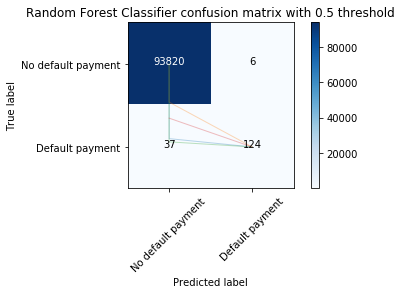

In [ ]:
#with 0.5 thresold 
randomf = RandomForestClassifier(n_estimators=1000,min_samples_leaf=10)
randomf.fit(X_train, y_train)
y_predicted = randomf.predict(X_test)

display_accuracy_analysis_and_confusion_matrix(y_test, y_predicted, 
                        ['No default payment', 'Default payment'], 'Random Forest Classifier confusion matrix with 0.5 threshold')

display_roc(RandomForestClassifier(n_estimators=1000, min_samples_leaf=10), X, y)

# Testing other threshold than 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)
randomf2 = RandomForestClassifier(n_estimators=1000, min_samples_leaf=10)
randomf2.fit(X_train,y_train)

y_predicted = randomf2.predict_proba(X_test)
y_test_predictions_high_precision = y_predicted[:,1] > 0.8
y_test_predictions_high_recall = y_predicted[:,1] > 0.1
y_test_predictions_suggested_by_AUC = y_predicted[:,1] > 0.56

display_accuracy_analysis_and_confusion_matrix(y_test, y_test_predictions_high_precision, 
                        ['No default payment', 'Default payment'], 'Random Forest Classifier confusion matrix with 0.8 threshold')

display_accuracy_analysis_and_confusion_matrix(y_test, y_test_predictions_high_recall, 
                        ['No default payment', 'Default payment'], 'Random Forest Classifier confusion matrix with 0.1 threshold')

display_accuracy_analysis_and_confusion_matrix(y_test, y_test_predictions_suggested_by_AUC, 
                        ['No default payment', 'Default payment'], 'Random Forest Classifier confusion matrix with 0.56 threshold')


#### 2.4 Evaluation

TODO